In [11]:
!pip install yfinance==0.2.4
!pip install pandas==1.3.3
!mamba install bs4==4.10.0 -y
!pip install nbformat==5.2.0

  Using cached yfinance-0.2.4-py2.py3-none-any.whl (51 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 24.2 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.1.67
    Uninstalling yfinance-0.1.67:
      Successfully uninstalled yfinance-0.1.67

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
  

In [12]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [13]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [14]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<AxesSubplot:title={'center':'Tesla Stock Open Price Over Time'}, xlabel='Date'>

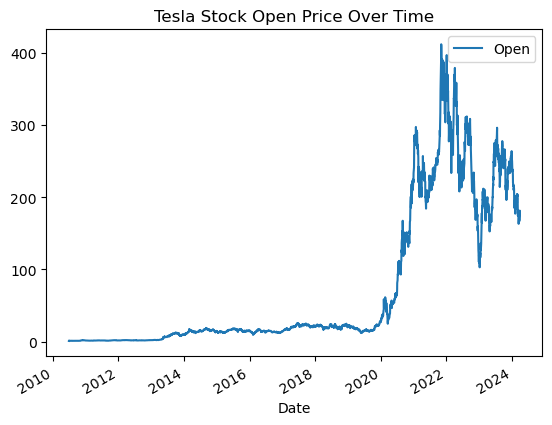

In [15]:
tesla_data.reset_index(inplace=True)
tesla_data.plot(x="Date", y="Open", title="Tesla Stock Open Price Over Time")

In [16]:
amd = yf.Ticker("AMD")
amd_data = amd.history(period="max")
amd_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


<AxesSubplot:title={'center':'AMD Stock Open Price Over Time'}, xlabel='Date'>

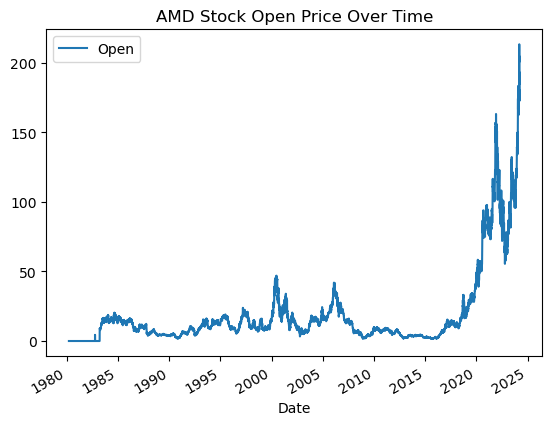

In [17]:
amd_data.reset_index(inplace=True)
amd_data.plot(x="Date", y="Open", title="AMD Stock Open Price Over Time")

In [18]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [25]:
tasle_data  = requests.get(url).text

In [26]:
soup = BeautifulSoup(tasle_data, 'html.parser')

# Initialize lists to hold extracted data
years = []
annual_revenues = []

# Extract annual revenue data
annual_table = soup.find_all("table", class_="historical_data_table table")[0]
for row in annual_table.find_all("tr")[1:]:  # Skip header row
    cols = row.find_all("td")
    years.append(cols[0].text.strip())
    annual_revenues.append(cols[1].text.strip())

# Convert lists to dataframe
annual_revenue_df = pd.DataFrame({
    "Year": years,
    "Annual Revenue": annual_revenues
})

print(annual_revenue_df.tail(5))

    Year Annual Revenue
11  2009         $8,806
12  2008         $7,094
13  2007         $5,319
14  2006         $3,092
15  2005         $1,843


In [27]:
 url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [28]:
gme_data  = requests.get(url).text

In [29]:
soup = BeautifulSoup(gme_data, 'html.parser')

# Initialize lists to hold extracted data
years = []
annual_revenues = []

# Extract annual revenue data
annual_table = soup.find_all("table", class_="historical_data_table table")[0]
for row in annual_table.find_all("tr")[1:]:  # Skip header row
    cols = row.find_all("td")
    years.append(cols[0].text.strip())
    annual_revenues.append(cols[1].text.strip())

# Convert lists to dataframe
annual_revenue_df = pd.DataFrame({
    "Year": years,
    "Annual Revenue": annual_revenues
})

print(annual_revenue_df.tail(5))

    Year Annual Revenue
11  2009         $8,806
12  2008         $7,094
13  2007         $5,319
14  2006         $3,092
15  2005         $1,843
